In [4]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("appointments_regional.csv")

In [12]:
df.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107.0
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791.0
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686.0
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268.0
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971.0


In [14]:
df_clean = df.dropna(subset=[
    "appointment_month",
    "appointment_status",
    "hcp_type",
    "appointment_mode",
    "time_between_book_and_appointment"
])

In [16]:
df_clean.loc[:, "appointment_month"] = pd.to_datetime(df_clean["appointment_month"], errors="coerce")

# Confirm it worked
df_clean.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01 00:00:00,Attended,GP,Face-to-Face,1 Day,8107.0
1,E54000034,2020-01-01 00:00:00,Attended,GP,Face-to-Face,15 to 21 Days,6791.0
2,E54000034,2020-01-01 00:00:00,Attended,GP,Face-to-Face,2 to 7 Days,20686.0
3,E54000034,2020-01-01 00:00:00,Attended,GP,Face-to-Face,22 to 28 Days,4268.0
4,E54000034,2020-01-01 00:00:00,Attended,GP,Face-to-Face,8 to 14 Days,11971.0


In [18]:
missed = df_clean[df_clean["appointment_status"] == "DNA"]

In [20]:
monthly = missed.groupby("appointment_month")["appointment_status"].count().reset_index()

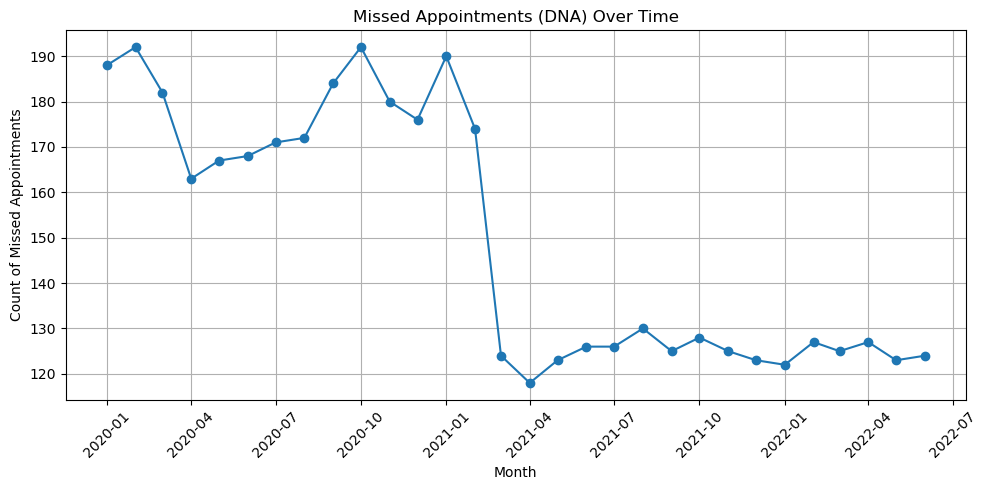

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(monthly["appointment_month"], monthly["appointment_status"], marker='o')
plt.title("Missed Appointments (DNA) Over Time")
plt.xlabel("Month")
plt.ylabel("Count of Missed Appointments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
missed_by_region = missed.groupby("icb_ons_code")["appointment_status"].count().sort_values(ascending=False)

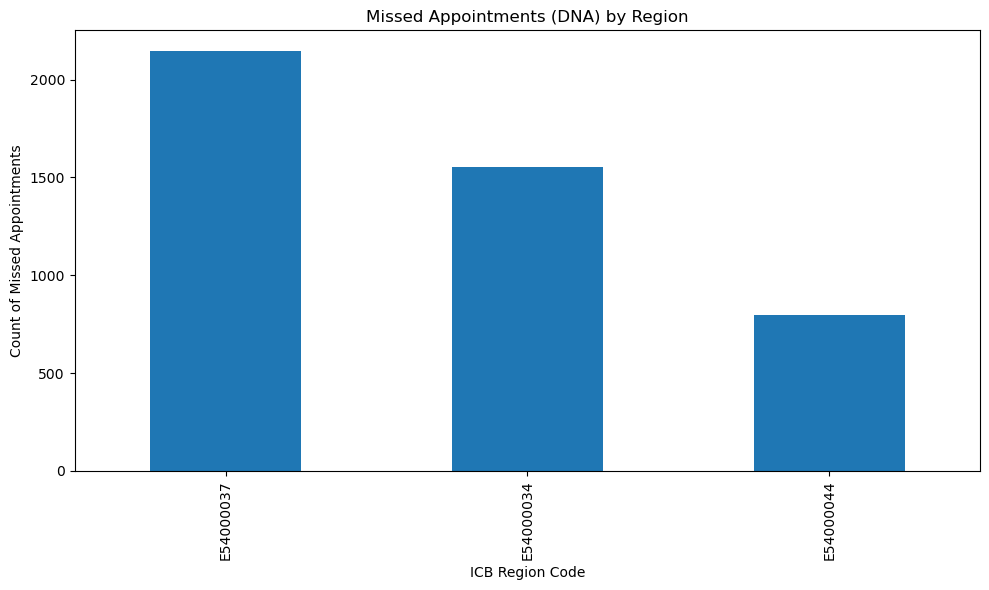

In [26]:
plt.figure(figsize=(10, 6))
missed_by_region.plot(kind="bar")
plt.title("Missed Appointments (DNA) by Region")
plt.xlabel("ICB Region Code")
plt.ylabel("Count of Missed Appointments")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
icb_region_names = {
    "E54000034": "North East",
    "E54000037": "South East",
    "E54000044": "London"
}

In [30]:
missed["region_name"] = missed["icb_ons_code"].map(icb_region_names)

/var/folders/xh/771g8qzd27x_4gxszttpc5yc0000gn/T/ipykernel_58679/1931713980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed["region_name"] = missed["icb_ons_code"].map(icb_region_names)


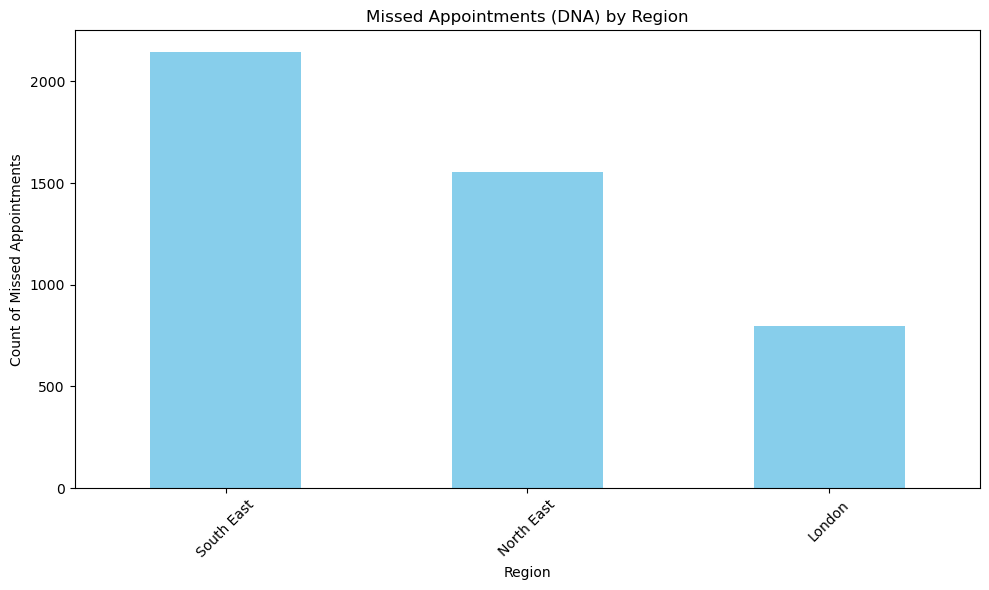

In [32]:
missed_by_region_named = missed.groupby("region_name")["appointment_status"].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missed_by_region_named.plot(kind="bar", color="skyblue")
plt.title("Missed Appointments (DNA) by Region")
plt.xlabel("Region")
plt.ylabel("Count of Missed Appointments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
appointments_by_month = df_clean.groupby("appointment_month")["appointment_status"].count().reset_index()

In [36]:
appointments_by_month.rename(columns={"appointment_status": "total_appointments"}, inplace=True)

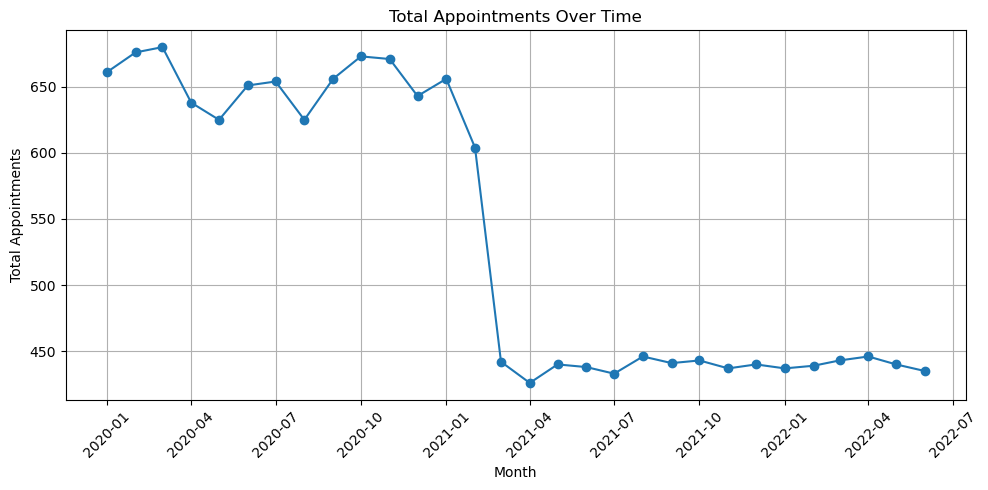

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(appointments_by_month["appointment_month"], appointments_by_month["total_appointments"], marker='o')
plt.title("Total Appointments Over Time")
plt.xlabel("Month")
plt.ylabel("Total Appointments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

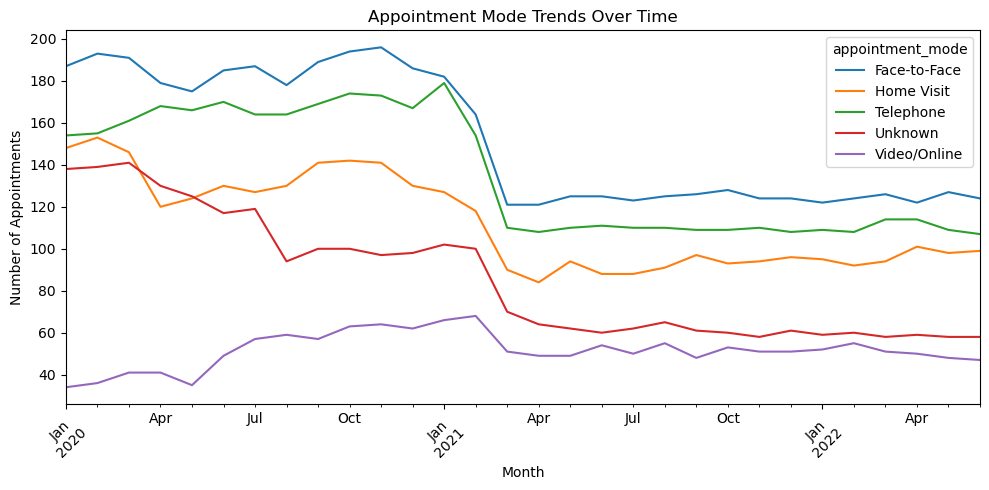

In [46]:
modes = df_clean.groupby(["appointment_month", "appointment_mode"]).size().unstack()
modes.plot(figsize=(10,5))
plt.title("Appointment Mode Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

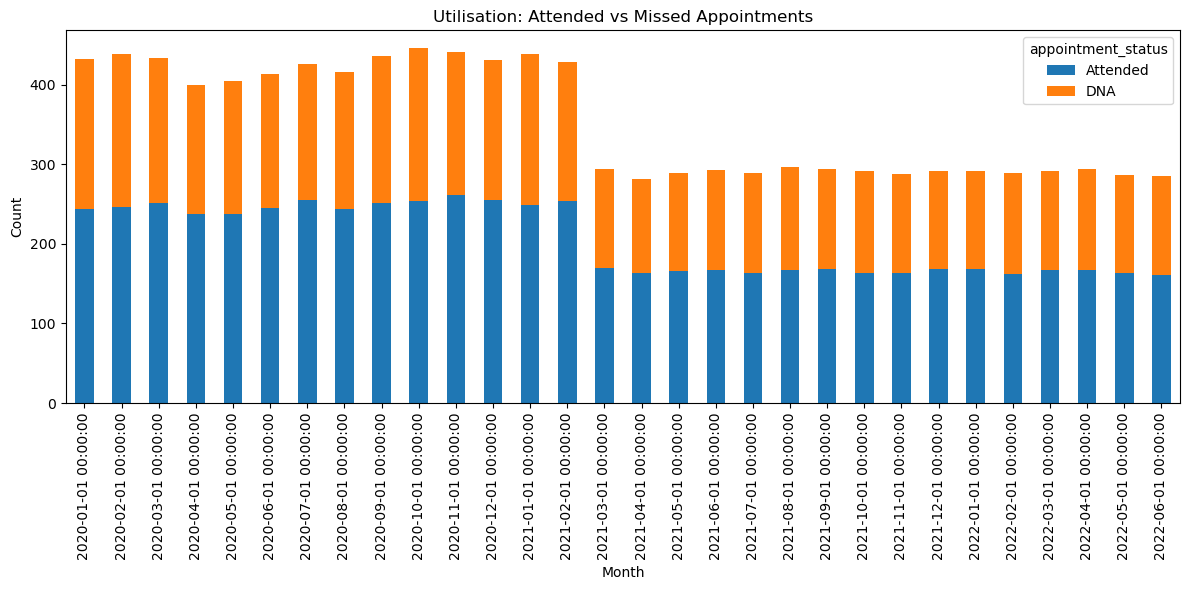

In [48]:
util = df_clean[df_clean["appointment_status"].isin(["Attended", "DNA"])]
util = util.groupby(["appointment_month", "appointment_status"]).size().unstack()
util.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Utilisation: Attended vs Missed Appointments")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [52]:
import ast

def extract_hashtags(row):
    try:
        tags = ast.literal_eval(row)
        return [tag['text'] for tag in tags['hashtags']]
    except:
        return []

tweets['hashtags'] = tweets['tweet_entities'].apply(extract_hashtags)

tweets[['tweet_full_text', 'hashtags']].head()

,tweet_full_text,hashtags
0,As Arkansas’ first Comprehensive Stroke Certif...,[Healthcare]
1,RT @AndreaGrammer: Work-life balance is at the...,"[PremiseHealth, hiring]"
2,RT @OntarioGreens: $10 billion can go a long w...,[Healthcare]
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,[NEW]
4,ICYMI: Our recent blogs on Cybersecurity in Ac...,"[blogs, digitaltransformation, cybersecurity, ..."


In [54]:
from collections import Counter

all_hashtags = sum(tweets['hashtags'], [])
hashtag_counts = Counter(all_hashtags)

In [56]:
import pandas as pd
top_hashtags = pd.DataFrame(hashtag_counts.most_common(10), columns=['Hashtag', 'Count'])

print(top_hashtags)

      Hashtag  Count
0  healthcare    599
1  Healthcare    198
2      health     68
3  HealthCare     47
4          AI     45
5    medicine     42
6         job     38
7    strategy     31
8     medical     30
9  MedTwitter     25


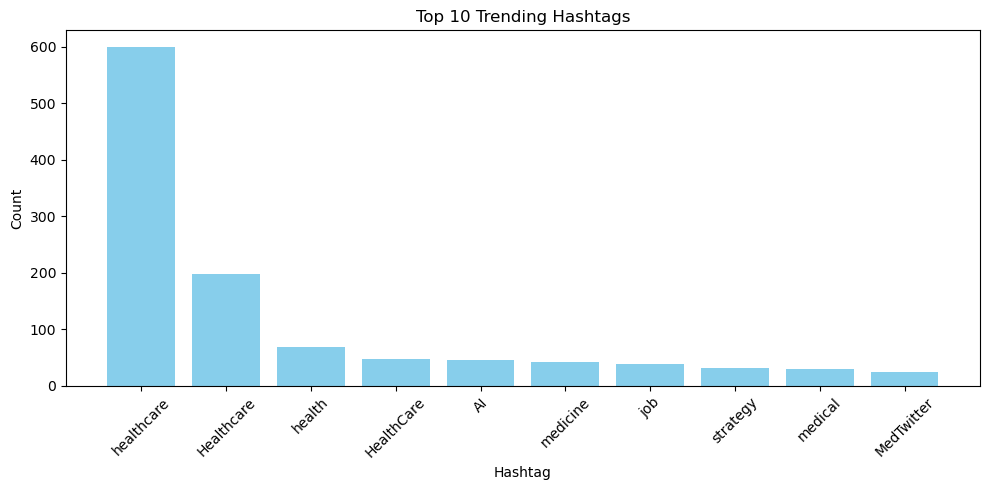

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(top_hashtags['Hashtag'], top_hashtags['Count'], color='skyblue')
plt.title("Top 10 Trending Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
hcp_summary = df_clean.groupby("hcp_type")["appointment_status"].value_counts().unstack().fillna(0)
display(hcp_summary)

appointment_status,Attended,DNA,Unknown
hcp_type,,,
GP,2401,1785,2141
Other Practice staff,2430,1953,2172
Unknown,1307,757,1193


In [62]:
missed_modes = df_clean[df_clean["appointment_status"] == "DNA"]
mode_summary = missed_modes["appointment_mode"].value_counts()
display(mode_summary)

appointment_mode
Face-to-Face    1387
Telephone       1232
Unknown          761
Home Visit       695
Video/Online     420
Name: count, dtype: int64

<Axes: title={'center': 'Missed Appointments by Mode'}, xlabel='Mode', ylabel='Count'>

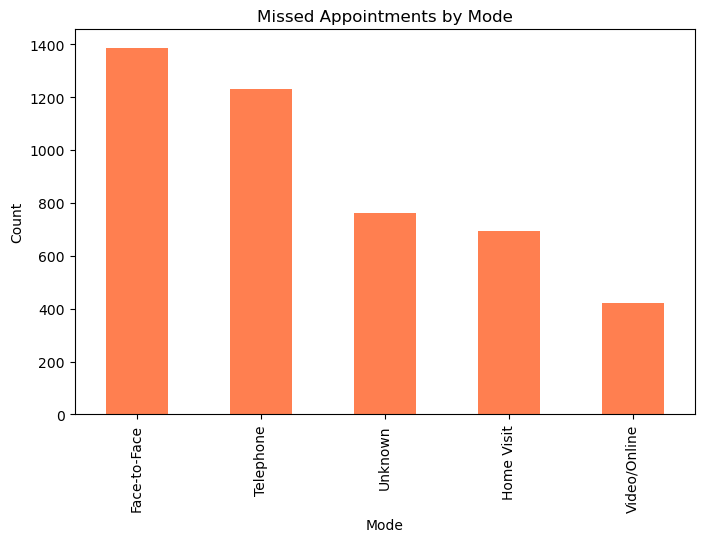

In [64]:
mode_summary.plot(kind="bar", title="Missed Appointments by Mode", xlabel="Mode", ylabel="Count", color='coral', figsize=(8,5))

<Axes: title={'center': 'Monthly Utilization Rate'}, xlabel='appointment_month', ylabel='Rate'>

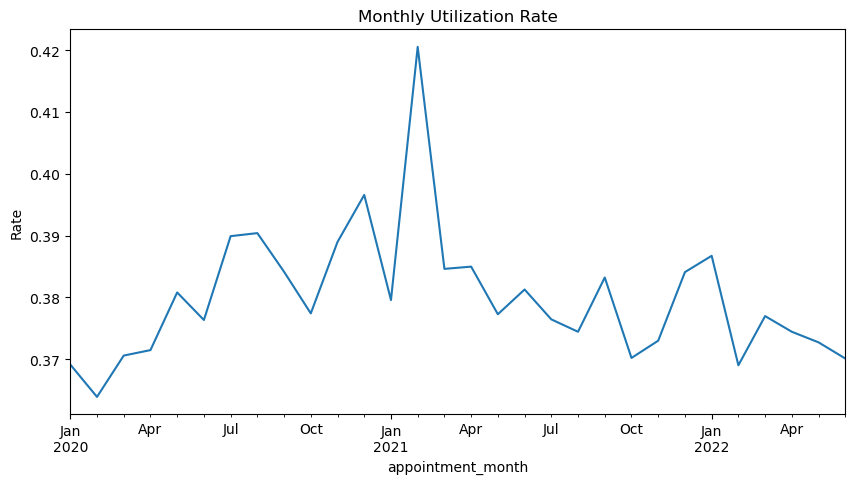

In [68]:
monthly_util = df_clean.groupby(["appointment_month", "appointment_status"]).size().unstack().fillna(0)
monthly_util["utilization_rate"] = monthly_util["Attended"] / monthly_util.sum(axis=1)
monthly_util["utilization_rate"].plot(title="Monthly Utilization Rate", ylabel="Rate", figsize=(10,5))